In [1]:
pip install imbalanced-learn

     -------------------------------------- 226.0/226.0 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [7]:
from imblearn.under_sampling import NearMiss
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
df = pd.read_csv("transposedCSV.csv")

In [18]:
df.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,...,993,994,995,996,997,998,999,1000,1001,0
0,Person_01,0,ECG_ECG_1,21.728105,-0.210206,13.817199,0.240768,9.930746,11.692857,0.996308,...,-0.128886,-0.128580,-0.128434,-0.129542,-0.128968,-0.129040,-0.128927,-0.129132,-0.128843,Person_01
1,NaN,1,ECG_ECG_2,11.777599,2.107501,0.685181,-0.904224,4.206860,19.559812,1.906567,...,-0.143061,-0.119399,-0.076156,-0.251659,-0.186428,-0.177225,-0.169056,-0.168310,-0.162632,Person_01
2,NaN,2,ECG_ECG_3,5.455075,5.119352,-0.226381,0.787679,0.083462,22.429361,3.562693,...,-0.177553,-0.167216,-0.176586,-0.190572,-0.179186,-0.184501,-0.177825,-0.183258,-0.180367,Person_01
3,NaN,3,ECG_ECG_4,8.891512,9.454880,1.580336,3.151586,-1.459394,20.474485,4.746246,...,-0.149355,-0.142214,-0.143288,-0.161009,-0.151126,-0.152309,-0.151184,-0.150931,-0.150573,Person_01
4,NaN,4,ECG_ECG_5,17.439554,4.621039,-1.941839,2.565514,-3.653124,11.861268,9.672180,...,-0.127514,-0.123369,-0.118609,-0.141188,-0.131854,-0.131823,-0.129988,-0.129807,-0.130063,Person_01


In [19]:
df = df.drop(df.columns[[0, 1, 2]], axis=1)

In [21]:
mapping = {'0': 'person'}
df = df.rename(columns=mapping)

In [22]:
df.head()

,2,3,4,5,6,7,8,9,10,11,...,993,994,995,996,997,998,999,1000,1001,person
0,21.728105,-0.210206,13.817199,0.240768,9.930746,11.692857,0.996308,1.325309,-0.408698,1.321695,...,-0.128886,-0.128580,-0.128434,-0.129542,-0.128968,-0.129040,-0.128927,-0.129132,-0.128843,Person_01
1,11.777599,2.107501,0.685181,-0.904224,4.206860,19.559812,1.906567,-0.019333,-0.033547,0.891750,...,-0.143061,-0.119399,-0.076156,-0.251659,-0.186428,-0.177225,-0.169056,-0.168310,-0.162632,Person_01
2,5.455075,5.119352,-0.226381,0.787679,0.083462,22.429361,3.562693,-0.612701,0.544027,-0.057700,...,-0.177553,-0.167216,-0.176586,-0.190572,-0.179186,-0.184501,-0.177825,-0.183258,-0.180367,Person_01
3,8.891512,9.454880,1.580336,3.151586,-1.459394,20.474485,4.746246,-0.493598,1.328868,0.017198,...,-0.149355,-0.142214,-0.143288,-0.161009,-0.151126,-0.152309,-0.151184,-0.150931,-0.150573,Person_01
4,17.439554,4.621039,-1.941839,2.565514,-3.653124,11.861268,9.672180,-2.843101,1.861014,-1.345132,...,-0.127514,-0.123369,-0.118609,-0.141188,-0.131854,-0.131823,-0.129988,-0.129807,-0.130063,Person_01


<AxesSubplot:xlabel='person', ylabel='count'>

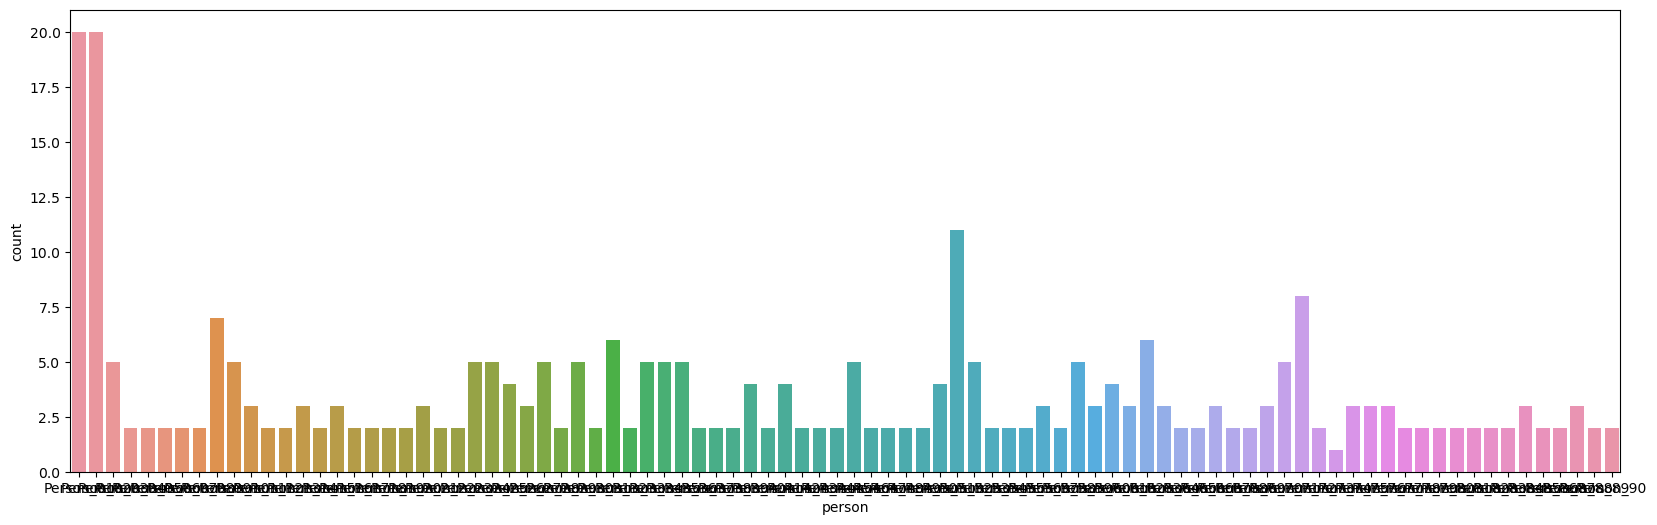

In [24]:
plt.figure(figsize= (20,6))
sns.countplot(x='person',data=df)

In [41]:
df['person'].value_counts()

Person_01    20
Person_02    20
Person_52    11
Person_72     8
Person_09     7
             ..
Person_54     2
Person_20     2
Person_56     2
Person_90     2
Person_74     1
Name: person, Length: 90, dtype: int64

In [42]:
df.drop(index=df[df['person']=='Person_74'].index, inplace=True)

In [43]:
x = df.drop(['person'],axis=1)
y = df.person

In [44]:
undersampler = NearMiss(version=1,n_neighbors=1)
x_undersampled, y_undersampled = undersampler.fit_resample(x,y)

c:\Users\Emad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person', ylabel='count'>

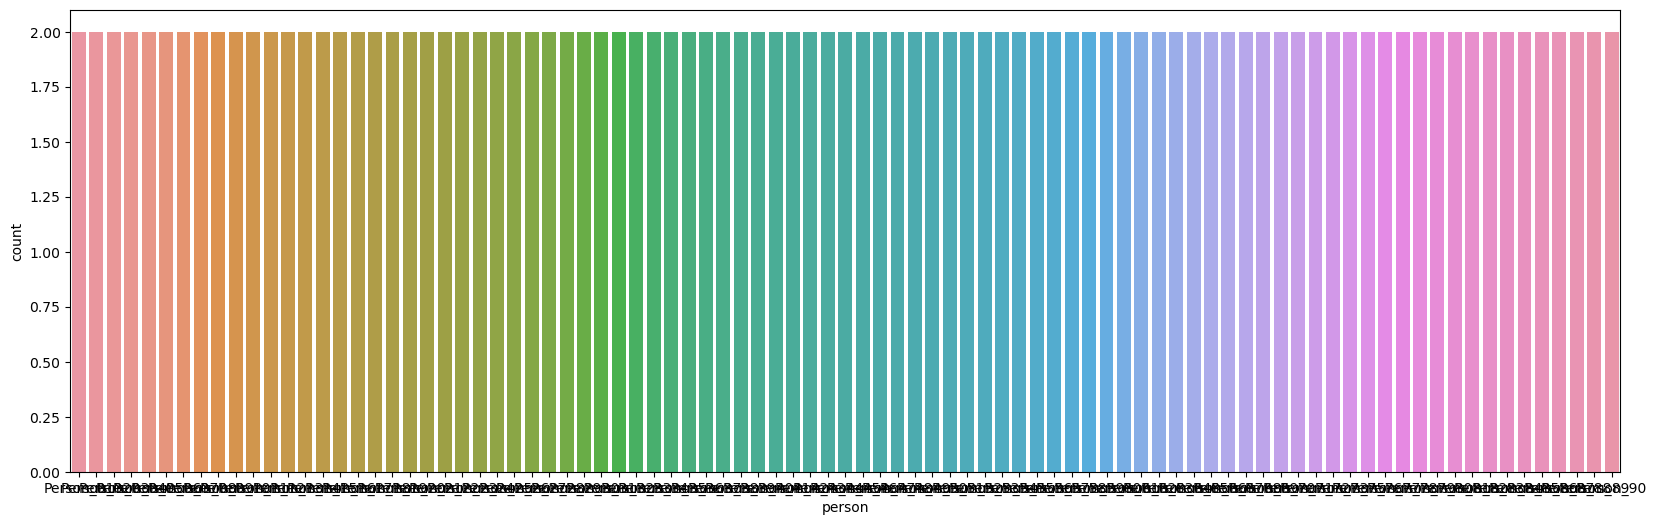

In [45]:
plt.figure(figsize= (20,6))
sns.countplot(y_undersampled)

In [47]:
x_undersampled

,2,3,4,5,6,7,8,9,10,11,...,992,993,994,995,996,997,998,999,1000,1001
0,23.112658,8.538781,0.425793,1.230016,0.005141,2.029600,0.491016,0.114648,0.072702,0.085432,...,-0.060499,-0.065538,-0.050634,-0.052927,-0.092265,-0.070342,-0.072712,-0.068174,-0.069512,-0.067895
1,7.146226,4.102521,0.137414,0.246039,0.477392,9.133297,0.728834,-0.019946,0.026280,0.295209,...,-0.081841,-0.097473,-0.055482,-0.085445,-0.146014,-0.101316,-0.110756,-0.099929,-0.103348,-0.099422
2,11.704247,3.382207,0.265497,-0.201967,1.902853,6.407719,0.216538,0.372613,0.021982,1.632265,...,-0.071885,-0.077327,-0.059798,-0.062222,-0.110153,-0.084044,-0.086833,-0.081905,-0.082813,-0.080793
3,10.616141,3.413444,0.988564,0.206286,1.140768,7.471550,1.047037,-0.173055,0.341942,0.609700,...,-0.072587,-0.084542,-0.052500,-0.083846,-0.114593,-0.086432,-0.092971,-0.085767,-0.088795,-0.086119
4,11.767392,1.751079,0.235837,-0.005496,1.073812,1.934711,-0.377743,0.291211,-0.214866,0.354832,...,-0.056140,-0.062324,-0.047141,-0.057991,-0.078872,-0.063455,-0.066695,-0.062860,-0.063974,-0.062681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.930848,0.671833,0.017209,0.120801,0.136795,2.201028,0.280659,-0.018547,-0.011805,0.076465,...,-0.054897,-0.064008,-0.035008,-0.071848,-0.085317,-0.065831,-0.070480,-0.065123,-0.066633,-0.064675
174,1.618277,1.343516,0.150140,-0.088268,0.621020,0.411705,-0.133667,0.067585,0.055865,0.447332,...,-0.046572,-0.052597,-0.033571,-0.037395,-0.086214,-0.058941,-0.061903,-0.056419,-0.057740,-0.055492
175,1.352607,0.193429,0.015043,-0.012212,0.286609,0.224111,-0.093485,0.061366,0.005858,0.255623,...,-0.040901,-0.048372,-0.026813,-0.033759,-0.082935,-0.053297,-0.057777,-0.051464,-0.053010,-0.050636
176,25.751652,17.595858,4.030464,1.764895,-0.415290,0.731957,1.768331,0.160797,-0.068742,0.012727,...,-0.059687,-0.059419,-0.059235,-0.059550,-0.058726,-0.058732,-0.059502,-0.058454,-0.059952,-0.060423


In [54]:
y_undersampled[0]

'Person_01'

In [64]:
x_train = x_undersampled[::2]
x_test = x_undersampled[1::2]
y_train = y_undersampled[::2]
y_test = y_undersampled[1::2]

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

In [66]:
gbm.fit(x_train, y_train)


GradientBoostingClassifier()

In [67]:
ytrain_pred = gbm.predict(x_train)
accuracy = accuracy_score(y_train, ytrain_pred)
print('Train Accuracy: ', accuracy)

Train Accuracy:  1.0


In [68]:
ytest_pred = gbm.predict(x_test)
accuracy = accuracy_score(y_test, ytest_pred)
print('Test Accuracy: ', accuracy)

Test Accuracy:  0.07865168539325842
